In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%run "../notebooks/cargar_df.ipynb"

In [2]:
train=get_train()

In [3]:
train.head()

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Bureaucratic_Code,Account_Created_Date,Source,...,Planned_Delivery_End_Date,Month,Delivery_Quarter,Delivery_Year,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage
0,27761,EMEA,None,1,1,1,1,Bureaucratic_Code_4,2015-06-16,None,...,2016-06-30,2016-05-01,Q2,2016,10,EUR,5272800.0,EUR,5272800.0,Closed Lost
1,27760,EMEA,None,0,0,0,0,Bureaucratic_Code_4,2015-06-16,None,...,2016-01-20,2016-01-01,Q1,2016,0,EUR,48230.0,EUR,48230.0,Closed Won
2,27446,Americas,NW America,0,0,0,0,Bureaucratic_Code_4,2015-04-21,Source_7,...,2016-01-25,2016-01-01,Q1,2016,0,USD,83865.6,USD,83865.6,Closed Won
3,16808,Americas,NW America,1,0,1,0,Bureaucratic_Code_5,2013-07-27,Source_11,...,2018-03-31,2018-02-01,Q1,2018,14,USD,7421881.5,USD,7421881.5,Closed Lost
4,16805,Americas,NW America,1,0,1,0,Bureaucratic_Code_5,2013-07-27,Source_11,...,2018-02-28,2018-02-01,Q1,2018,25,USD,13357192.5,USD,13357192.5,Closed Lost


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16947 entries, 0 to 16946
Data columns (total 47 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   ID                                  16947 non-null  int16         
 1   Region                              16947 non-null  category      
 2   Territory                           16947 non-null  category      
 3   Pricing, Delivery_Terms_Quote_Appr  16947 non-null  int16         
 4   Pricing, Delivery_Terms_Approved    16947 non-null  int16         
 5   Bureaucratic_Code_0_Approval        16947 non-null  category      
 6   Bureaucratic_Code_0_Approved        16947 non-null  category      
 7   Bureaucratic_Code                   16947 non-null  category      
 8   Account_Created_Date                16947 non-null  datetime64[ns]
 9   Source                              16947 non-null  object        
 10  Billing_Country       

#### ¿Cuantos días estuvo activa cada oportunidad?
Suponiendo que los días activos son los que pasaron desde que se creó la oportunidad hasta la última fecha que lo modificaron

In [5]:
train['Opportunity_Created_Date']

0       2015-12-07
1       2015-12-07
2       2015-12-08
3       2015-12-08
4       2015-12-08
           ...    
16942   2015-12-04
16943   2015-12-04
16944   2015-12-04
16945   2015-12-05
16946   2015-12-05
Name: Opportunity_Created_Date, Length: 16947, dtype: datetime64[ns]

In [6]:
train['Last_Modified_Date']

0       2016-06-13
1       2016-01-15
2       2016-09-29
3       2018-03-27
4       2018-03-27
           ...    
16942   2016-01-19
16943   2016-01-19
16944   2016-01-19
16945   2016-01-22
16946   2016-09-28
Name: Last_Modified_Date, Length: 16947, dtype: datetime64[ns]

In [7]:
# Calculo la cantidad de dias activos que tuvo cada oportunidad
dias_de_actividad = train['Last_Modified_Date'] - train['Opportunity_Created_Date']

In [8]:
dias_de_actividad

0       189 days
1        39 days
2       296 days
3       840 days
4       840 days
          ...   
16942    46 days
16943    46 days
16944    46 days
16945    48 days
16946   298 days
Length: 16947, dtype: timedelta64[ns]

In [9]:
dias_de_actividad.value_counts()

0 days       578
1 days       453
2 days       170
269 days     147
317 days     139
            ... 
608 days       1
525 days       1
425 days       1
1043 days      1
737 days       1
Length: 657, dtype: int64

In [10]:
dias_de_actividad.value_counts().value_counts()

1      122
2       55
3       29
4       18
5       17
      ... 
71       1
67       1
65       1
453      1
578      1
Length: 96, dtype: int64

In [11]:
df_dias_activos = train[['Stage']].copy()
df_dias_activos['Dias_activos'] = dias_de_actividad
df_dias_activos.sample(10)

,Stage,Dias_activos
8752,Closed Won,223 days
8762,Closed Won,220 days
7180,Closed Won,269 days
2694,Closed Won,229 days
1975,Closed Lost,299 days
6270,Closed Lost,310 days
474,Closed Lost,317 days
4532,Closed Lost,62 days
16049,Closed Won,1 days
10666,Closed Won,134 days


In [12]:
tabla_dias_activos = pd.pivot_table(df_dias_activos, index='Dias_activos', columns='Stage', aggfunc={'Stage':'count'}, fill_value=0)
tabla_dias_activos

Stage                                              
Stage        Closed Lost Closed Won Negotiation Proposal Qualification
Dias_activos                                                          
0 days                25        532           0       10            11
1 days                12        428           8        5             0
2 days                27        138           0        5             0
3 days                10        115           0        1             0
4 days                 6         89           0        1             0
...                  ...        ...         ...      ...           ...
1214 days              1          0           0        0             0
1222 days              2          0           0        0             0
1226 days              1          0           0        0             0
1499 days              1          0           0        0             0
1775 days              1          0           0        0             0

[657 rows x 5 columns]

In [13]:
tabla_dias_activos.columns = ['Closed Lost', 'Closed Won', 'Negotiation', 'Proposal', 'Qualification']

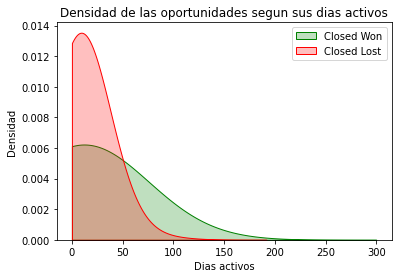

In [19]:
grafico = sns.kdeplot(tabla_dias_activos['Closed Won'], bw_method=2, shade=True, color="g", label='Closed Won', clip=(0,300))
grafico = sns.kdeplot(tabla_dias_activos['Closed Lost'], bw_method=2, shade=True, color="r", label='Closed Lost', clip=(0,300))
grafico.set(xlabel='Dias activos', ylabel='Densidad', title='Densidad de las oportunidades segun sus dias activos')
grafico.legend()

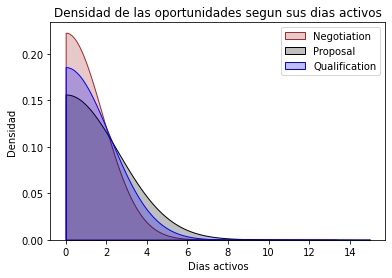

In [21]:
g = sns.kdeplot(tabla_dias_activos['Negotiation'], bw_method=5, shade=True, color="brown", label='Negotiation', clip=(0,15))
g = sns.kdeplot(tabla_dias_activos['Proposal'], bw_method=5, shade=True, color="black", label='Proposal', clip=(0,15))
g = sns.kdeplot(tabla_dias_activos['Qualification'], bw_method=5, shade=True, color="blue", label='Qualification', clip=(0,15))
g.set(xlabel='Dias activos', ylabel='Densidad', title='Densidad de las oportunidades segun sus dias activos')
g.legend()

#### ¿Hay alguna relación entre las oportunidades y los días en las que se crearon?

In [16]:
train['Opportunity_Created_Date']

0       2015-12-07
1       2015-12-07
2       2015-12-08
3       2015-12-08
4       2015-12-08
           ...    
16942   2015-12-04
16943   2015-12-04
16944   2015-12-04
16945   2015-12-05
16946   2015-12-05
Name: Opportunity_Created_Date, Length: 16947, dtype: datetime64[ns]

In [17]:
df_fecha_creacion = pd.DataFrame({'Dia': train['Opportunity_Created_Date'].dt.day, \
                                  'Mes': train['Opportunity_Created_Date'].dt.month, 'Cantidad': 1})
df_fecha_creacion.head()

,Dia,Mes,Cantidad
0,7,12,1
1,7,12,1
2,8,12,1
3,8,12,1
4,8,12,1


In [18]:
dias = sorted(df_fecha_creacion['Dia'].unique())

In [19]:
df_grafico = df_fecha_creacion.pivot_table(index='Mes', columns='Dia', aggfunc='count', fill_value=0)
df_grafico.columns = dias
df_grafico

,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
Mes,,,,,,,,,,,,,,,,,,,,,
1,0,7,33,65,61,95,101,30,18,65,...,124,31,76,62,88,48,28,17,107,54
2,76,42,42,5,26,25,37,86,101,46,...,27,38,32,13,31,37,27,45,0,0
3,40,49,34,25,39,28,85,64,34,81,...,65,85,28,12,20,90,64,50,65,50
4,28,21,42,47,88,75,95,34,12,42,...,21,23,41,76,35,41,57,0,13,0
5,27,95,61,89,16,44,23,27,159,40,...,41,92,34,32,41,8,19,24,49,50
6,35,35,19,21,27,52,44,107,63,8,...,58,74,5,11,38,57,73,112,163,0
7,18,35,38,35,53,39,49,72,28,34,...,25,16,60,39,95,32,37,24,26,38
8,56,30,57,19,18,10,40,42,50,72,...,35,34,46,36,33,7,35,31,39,58
9,57,50,21,38,61,56,77,44,54,27,...,28,20,11,25,72,65,61,94,32,0


Text(0.5, 1.0, 'Cantidad de oportunidades según su dia de creación')

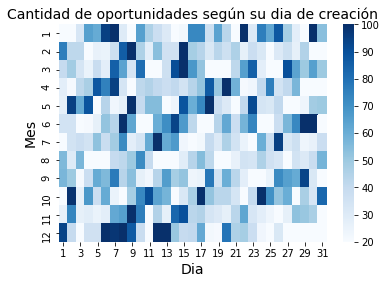

In [20]:
g = sns.heatmap(df_grafico, cmap="Blues", vmin=20, vmax=100)
g.set_xlabel('Dia', fontsize=14)
g.set_ylabel('Mes', fontsize = 14)
g.axes.set_title('Cantidad de oportunidades según su dia de creación', fontsize=14)

El grafico parece tener rayas diagonales, puede ser que la cantidad de oportunidades dependa del dia de la semana

In [21]:
df_dias_semana = pd.DataFrame({'Dia de semana': train['Opportunity_Created_Date'].dt.weekday, \
                               'Etapa': train['Stage']})
df_dias_semana.head()

,Dia de semana,Etapa
0,0,Closed Lost
1,0,Closed Won
2,1,Closed Won
3,1,Closed Lost
4,1,Closed Lost


In [22]:
df_dias_semana = df_dias_semana[df_dias_semana['Etapa'].isin(['Closed Won','Closed Lost'])]\
                            .pivot_table(index='Dia de semana', columns='Etapa', aggfunc={'Etapa':'count'})
df_dias_semana

Etapa                                              
Etapa         Closed Lost Closed Won Negotiation Proposal Qualification
Dia de semana                                                          
0                     978       1448           0        0             0
1                    1532       1985           0        0             0
2                    1634       1845           0        0             0
3                    1365       2124           0        0             0
4                    1437       1696           0        0             0
5                     333        413           0        0             0
6                      71         22           0        0             0

In [23]:
# Reemplazo los números por los dias de la semana
df_dias_semana.index = ['Lunes', 'Martes', 'Miercoles', 'Jueves', 'Viernes', 'Sabado', 'Domingo']

In [24]:
# Elimino el multi-indice y 3 columnas con pocos datos
df_dias_semana = df_dias_semana.droplevel(0, axis=1).drop(['Negotiation', 'Proposal', 'Qualification'], axis=1)
df_dias_semana

Etapa,Closed Lost,Closed Won
Lunes,978,1448
Martes,1532,1985
Miercoles,1634,1845
Jueves,1365,2124
Viernes,1437,1696
Sabado,333,413
Domingo,71,22


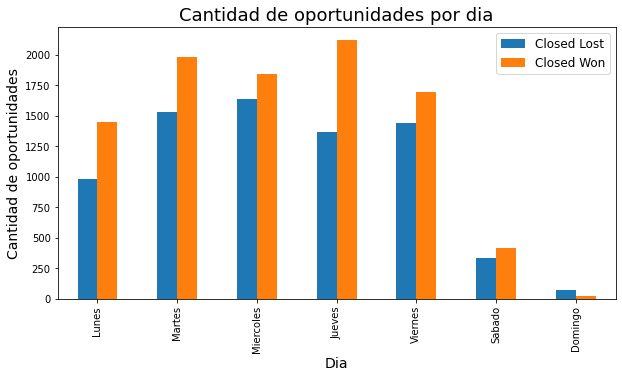

In [25]:
g = df_dias_semana.plot(kind='bar', figsize=(10,5))
g.set_title('Cantidad de oportunidades por dia',fontsize=18)
g.set_xlabel('Dia',fontsize=14)
g.set_ylabel('Cantidad de oportunidades',fontsize=14)
g.legend(fontsize=12)